In [1]:
import  pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("data/loan_train.csv")

In [3]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [4]:
df['Area'].value_counts()

Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [6]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [7]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [9]:
df.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

Target

<Axes: xlabel='Status'>

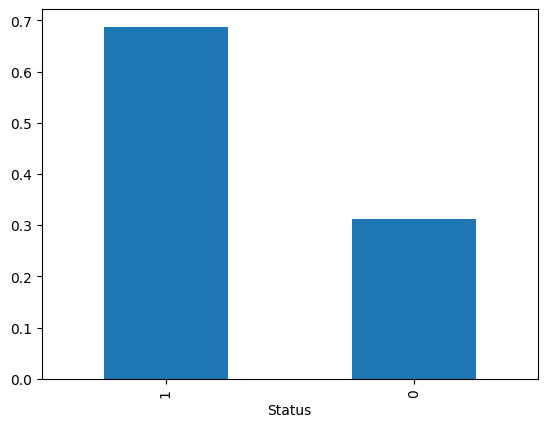

In [10]:
df['Status'] = df['Status'].map({'Y':1,'N':0})
df['Status'].value_counts(normalize=True).plot(kind='bar')


ANALYSIS

VISUALIZATION

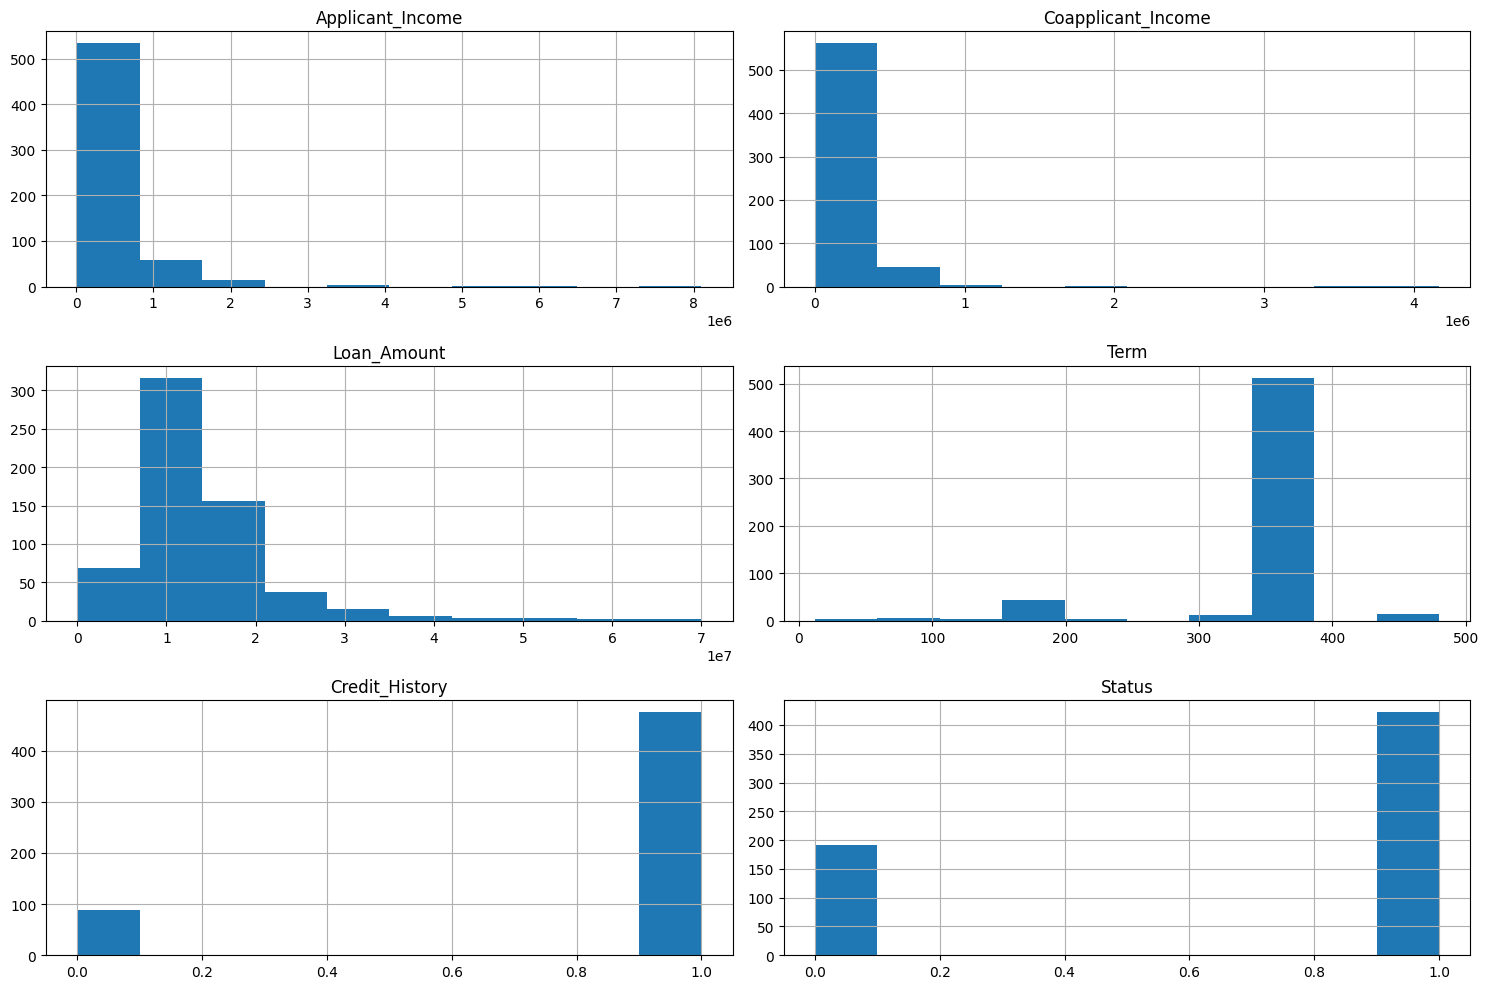

In [11]:
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


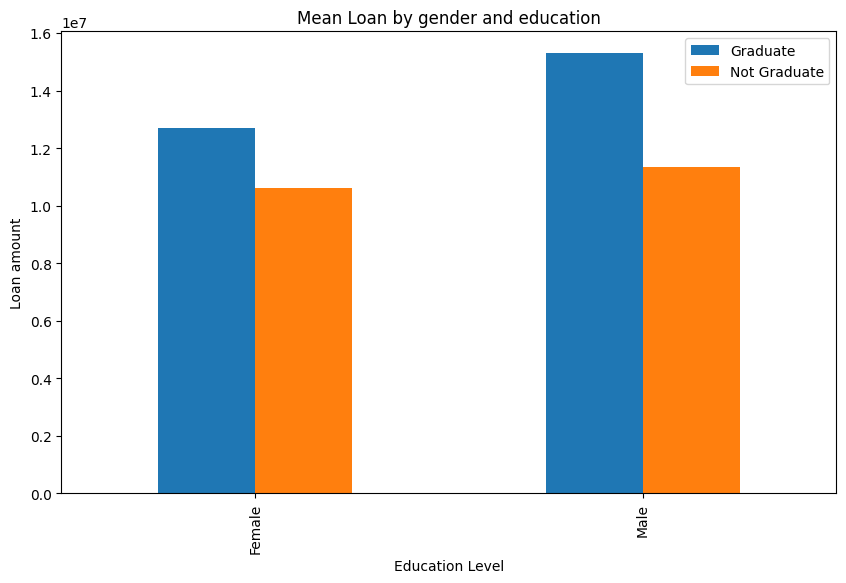

In [12]:
data = df.groupby(["Gender","Education"])["Loan_Amount"].mean()
#this creates gender as cols and education as rows

datas = data.unstack()

ax = datas.plot(kind='bar',figsize=(10,6))
plt.title("Mean Loan by gender and education")
plt.xlabel("Education Level")
plt.ylabel("Loan amount")
plt.legend()

#on avg graduate man demands for more loan then graduate femlae
#graduate male and female on avg takes larger loan amount then not graduate male and females

Relationship plot catagorical variable with target

Text(0.5, 1.0, 'Loan Status by Gender')

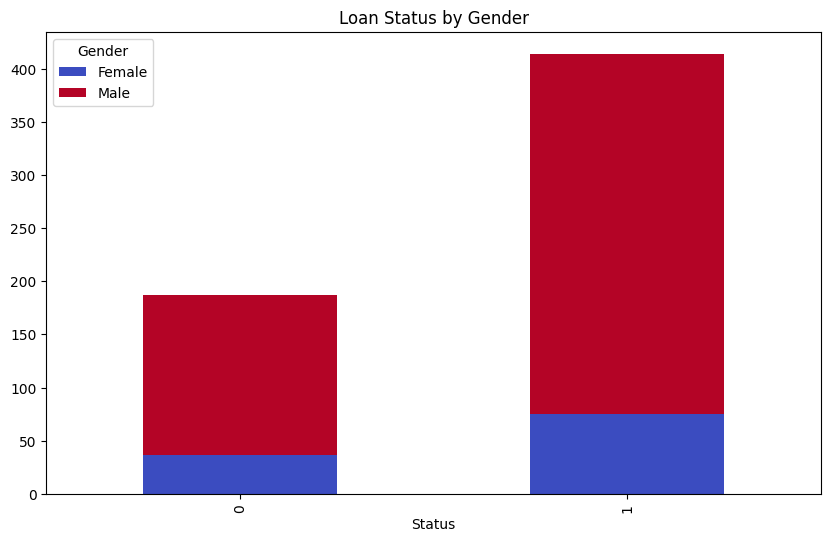

In [13]:

data = pd.crosstab(df["Status"],df["Gender"])
data.plot(kind='bar',stacked=True,figsize=(10,6),cmap='coolwarm')

#on avg male have higer chances of apporoval and disapproval of loan then female  its because man tends to have higher papulation 
plt.title("Loan Status by Gender")

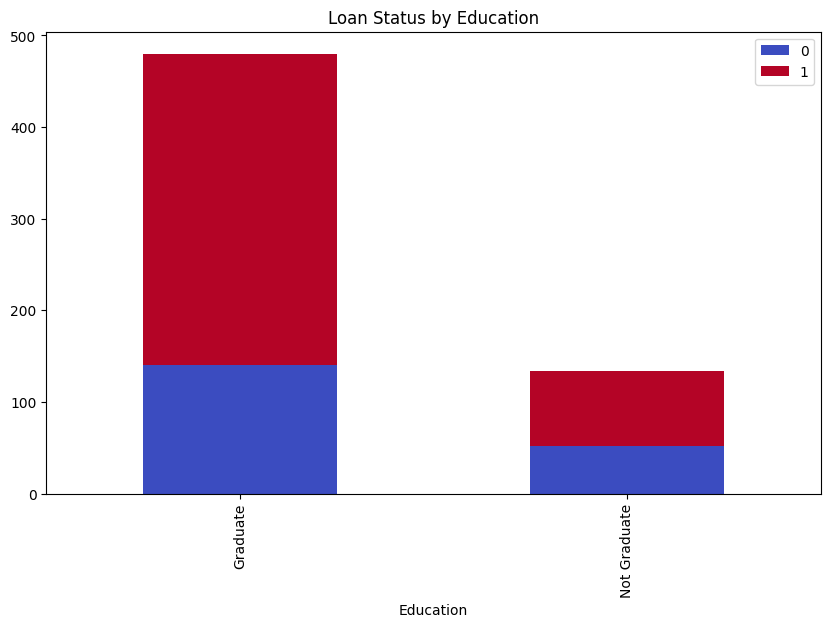

In [14]:
#on avg graduated people are more likely to get loan approval
#quetion loan approval status  interms on area
data = pd.crosstab(df["Education"],df["Status"])


data.plot(kind='bar',stacked=True,figsize=(10,6),cmap='coolwarm')
plt.title("Loan Status by Education")
plt.legend()


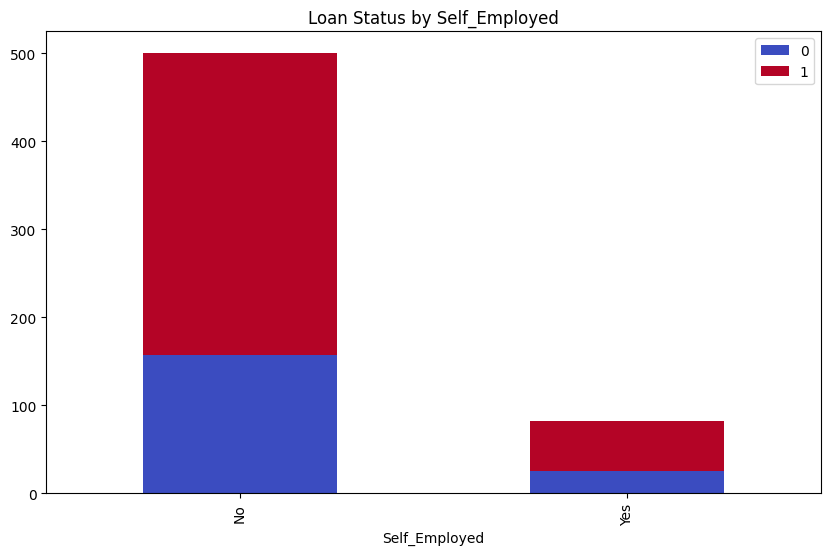

In [15]:
#self employed vs loan status
data = pd.crosstab(df["Self_Employed"],df["Status"])


data.plot(kind='bar',stacked=True,figsize=(10,6),cmap='coolwarm')
plt.title("Loan Status by Self_Employed")
plt.legend()

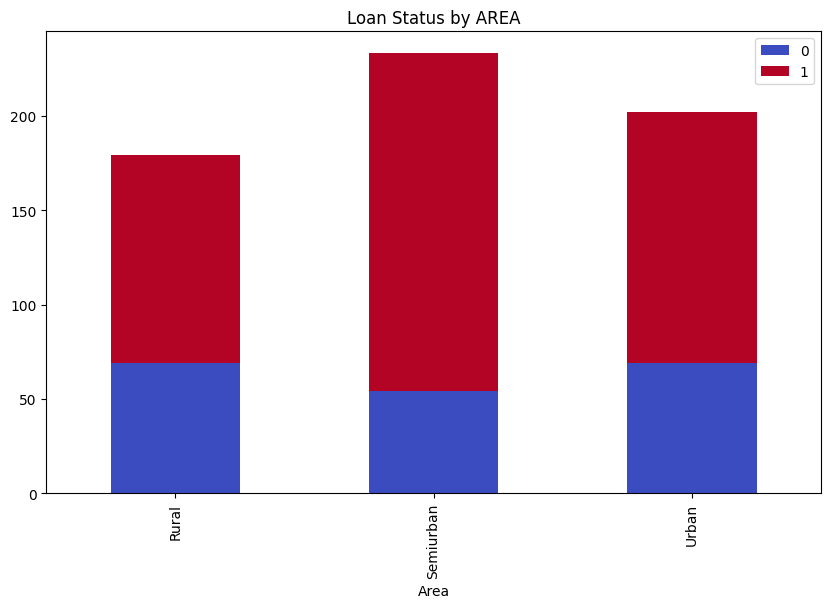

In [16]:
#self employed vs loan status
data = pd.crosstab(df["Area"],df["Status"])


data.plot(kind='bar',stacked=True,figsize=(10,6),cmap='coolwarm')
plt.title("Loan Status by AREA")
plt.legend()

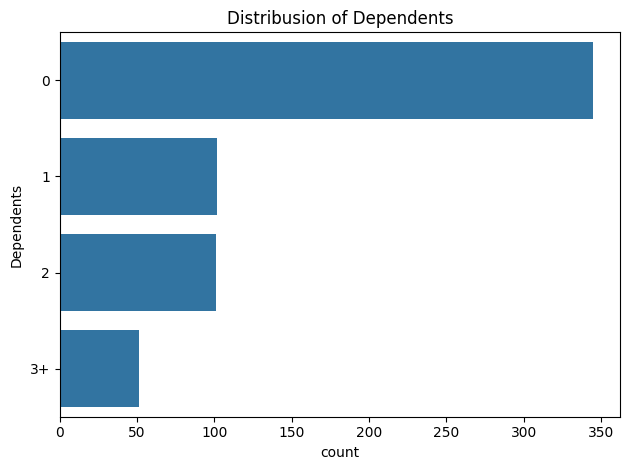

In [17]:
#“Most applicants in the loan prediction dataset have 0 dependents.
sns.countplot(df["Dependents"])
plt.title("Distribusion of Dependents")
plt.tight_layout()


Relation ship between numeric features

Text(0.5, 1.0, 'Relation between Income and Loan Amount')

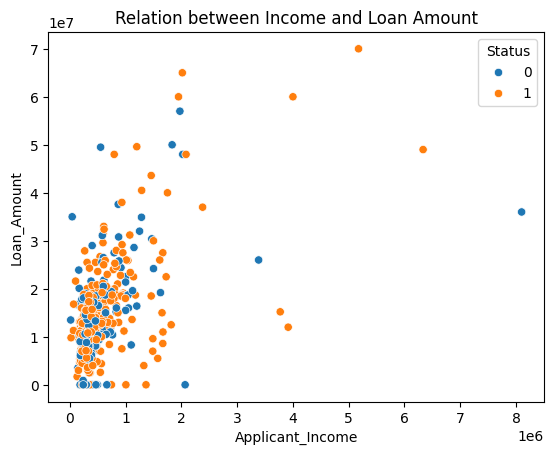

In [18]:
#Applicant_Income vs Loan_Amount
sns.scatterplot(data=df,x='Applicant_Income',y='Loan_Amount',hue='Status')
plt.title("Relation between Income and Loan Amount")

In [19]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,1


boxplot between numerical and catagoorcal Features

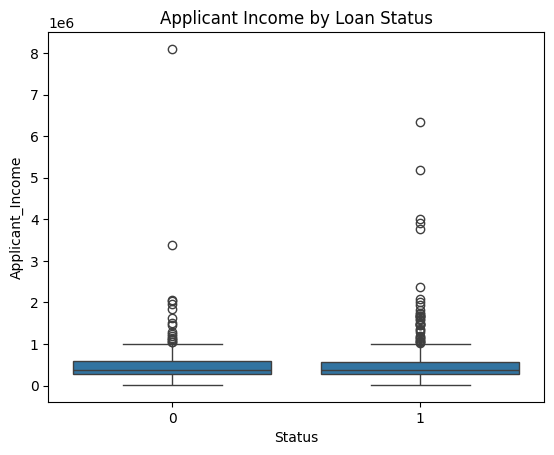

In [20]:
sns.boxplot(data=df, x="Status", y="Applicant_Income")
plt.title("Applicant Income by Loan Status")
plt.show()

In [21]:
df[(df["Applicant_Income"]>8000000) & (df["Status"]=="N")]
#409 outlier
df = df.drop(409)

In [22]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,1


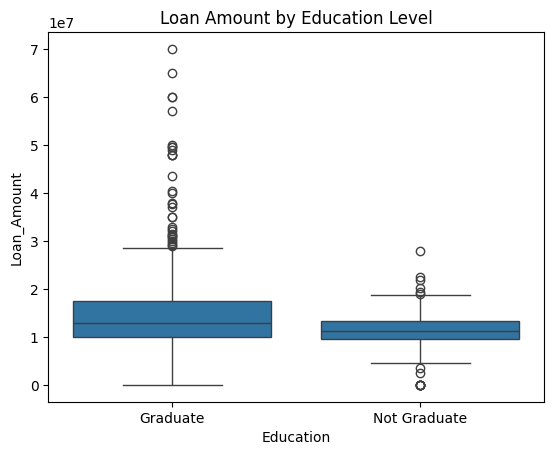

In [23]:
sns.boxplot(data=df, x="Education", y="Loan_Amount")
plt.title("Loan Amount by Education Level")
plt.show()

<Axes: xlabel='Status', ylabel='count'>

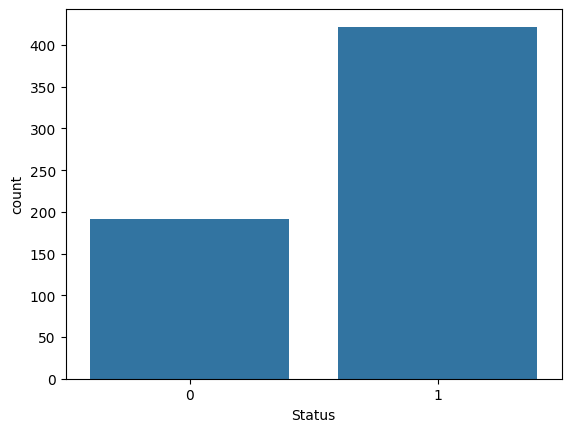

In [24]:
#Status 
sns.countplot(x='Status',data=df)
#we can see that Y has more frequency than N
#the data is imbalanced 
#we can use over sampler to fix this issue

correlation heatmap

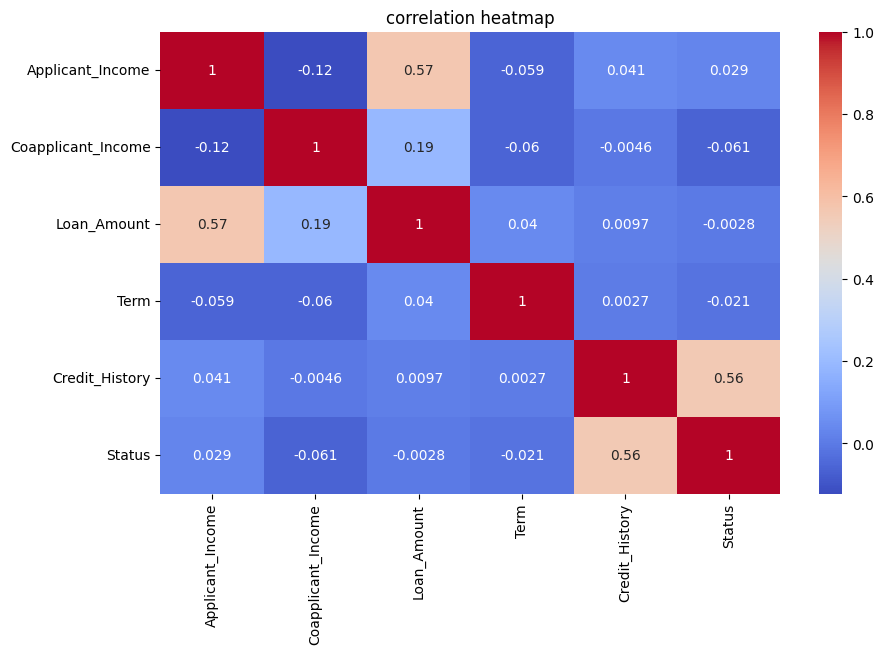

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['int','float']).corr(),annot=True,cmap='coolwarm')
plt.title("correlation heatmap")
plt.show()

In [26]:
df.select_dtypes(include=['int','float']).corr()['Status']

Applicant_Income      0.029204
Coapplicant_Income   -0.060652
Loan_Amount          -0.002800
Term                 -0.020618
Credit_History        0.559382
Status                1.000000
Name: Status, dtype: float64

<Axes: xlabel='Loan_Amount'>

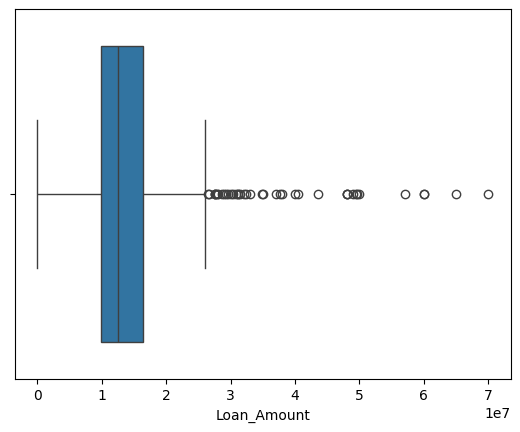

In [27]:
import seaborn as sns
sns.boxplot(x=df['Loan_Amount'])


In [28]:
df[df['Loan_Amount']==0]

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
35,Male,Yes,0,Graduate,No,227500,206700.0,0,360.0,1.0,Urban,1
63,Male,Yes,1,Graduate,No,494500,0.0,0,360.0,0.0,Rural,0
81,Male,Yes,1,Graduate,Yes,239500,0.0,0,360.0,1.0,Semiurban,1
95,Male,No,0,Graduate,NaN,678200,0.0,0,360.0,NaN,Urban,0
102,Male,Yes,NaN,Graduate,No,1365000,0.0,0,360.0,1.0,Urban,1
103,Male,Yes,0,Graduate,No,465200,358300.0,0,360.0,1.0,Semiurban,1
113,Female,No,1,Graduate,Yes,745100,0.0,0,360.0,1.0,Semiurban,1
127,Male,No,0,Graduate,No,386500,164000.0,0,360.0,1.0,Rural,1
202,Male,Yes,3+,Not Graduate,No,399200,0.0,0,180.0,1.0,Urban,0
284,Male,Yes,0,Graduate,No,2066700,0.0,0,360.0,1.0,Rural,0


corrrelation with target

In [29]:
"""#Feature Engineering

df['Loan_Amount'] = np.log1p(df['Loan_Amount'])

df["total_applicant_income"] = df["Applicant_Income"]+df["Coapplicant_Income"]
df["total_applicant_income"] = np.log(df["total_applicant_income"])


df['Loan_Burden_Log'] = np.log1p(df['Loan_Amount'] / df['total_applicant_income'])



df['Dependents']  = pd.to_numeric(df['Dependents'],errors='coerce')

#income pressure
df['Income_pressure'] = df['Dependents'] / (df['total_applicant_income']+1)


# 2. Income Stability Score
df['Income_Stability'] = ((df['Self_Employed'] == 'No').astype(int) + 
                          (df['Coapplicant_Income'] > 0).astype(int))

# 3. Loan Burden Severity (using the new feature)
df['Loan_Burden_Ratio'] = df['Loan_Amount'] / (df['Applicant_Income'] + df['Coapplicant_Income'] + 1)

# 4. Family Financial Pressure
df['Income_per_Dependent'] = (df['Applicant_Income'] + df['Coapplicant_Income']) / (df['Dependents'] + 1)
df['Income_per_Dependent'] = df['Income_per_Dependent'].fillna(freq)
# 6. Applicant Contribution Ratio
df['Applicant_Contribution'] = df['Applicant_Income'] / (df['Applicant_Income'] + df['Coapplicant_Income'] + 1)

df['Dependents_Stability'] = df['Dependents'] * df['Income_Stability']

df = df.drop(columns=["Applicant_Income","Coapplicant_Income"])

"""

'#Feature Engineering\n\ndf[\'Loan_Amount\'] = np.log1p(df[\'Loan_Amount\'])\n\ndf["total_applicant_income"] = df["Applicant_Income"]+df["Coapplicant_Income"]\ndf["total_applicant_income"] = np.log(df["total_applicant_income"])\n\n\ndf[\'Loan_Burden_Log\'] = np.log1p(df[\'Loan_Amount\'] / df[\'total_applicant_income\'])\n\n\n\ndf[\'Dependents\']  = pd.to_numeric(df[\'Dependents\'],errors=\'coerce\')\n\n#income pressure\ndf[\'Income_pressure\'] = df[\'Dependents\'] / (df[\'total_applicant_income\']+1)\n\n\n# 2. Income Stability Score\ndf[\'Income_Stability\'] = ((df[\'Self_Employed\'] == \'No\').astype(int) + \n                          (df[\'Coapplicant_Income\'] > 0).astype(int))\n\n# 3. Loan Burden Severity (using the new feature)\ndf[\'Loan_Burden_Ratio\'] = df[\'Loan_Amount\'] / (df[\'Applicant_Income\'] + df[\'Coapplicant_Income\'] + 1)\n\n# 4. Family Financial Pressure\ndf[\'Income_per_Dependent\'] = (df[\'Applicant_Income\'] + df[\'Coapplicant_Income\']) / (df[\'Dependents\'] + 

conerting into pipeline

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        # Convert Dependents safely
        X['Dependents'] = pd.to_numeric(X['Dependents'], errors='coerce').fillna(0)

        # Total income
        X['total_applicant_income'] = (
            X['Applicant_Income'] + X['Coapplicant_Income']
        )

        # Log transforms (SAFE)
        X['Log_Loan_Amount'] = np.log1p(X['Loan_Amount'])
        X['Log_Total_Income'] = np.log1p(X['total_applicant_income'])

        # Loan burden (log ratio)
        X['Loan_Burden_Log'] = np.log1p(
            X['Loan_Amount'] / (X['total_applicant_income'] + 1)
        )

        # Income pressure
        X['Income_pressure'] = (
            X['Dependents'] / (X['total_applicant_income'] + 1)
        )

        # Income stability
        X['Income_Stability'] = (
            (X['Self_Employed'] == 'No').astype(int) +
            (X['Coapplicant_Income'] > 0).astype(int)
        )

        # Loan burden ratio
        X['Loan_Burden_Ratio'] = (
            X['Loan_Amount'] /
            (X['Applicant_Income'] + X['Coapplicant_Income'] + 1)
        )

        # Income per dependent
        X['Income_per_Dependent'] = (
            (X['Applicant_Income'] + X['Coapplicant_Income']) /
            (X['Dependents'] + 1)
        )

        # Applicant contribution
        X['Applicant_Contribution'] = (
            X['Applicant_Income'] /
            (X['Applicant_Income'] + X['Coapplicant_Income'] + 1)
        )

        # Interaction feature
        X['Dependents_Stability'] = (
            X['Dependents'] * X['Income_Stability']

        )
        X['Dependents'] = pd.to_numeric(X['Dependents'], errors='coerce').fillna(0)


        return X


Feature matrix and target vector

In [31]:
x = df.drop(columns=["Status"])
y = df["Status"]

split data horizontally

In [32]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

#create column transformer

In [33]:
objcol = x.select_dtypes(include=['object']).columns.to_list()
numcols = x.select_dtypes(include=['int','float']).columns.to_list()

In [34]:
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


In [35]:
preprocessor = ColumnTransformer(
               transformers=[
               ('cat',cat_pipe,objcol), 
               ('num',num_pipe,numcols)
															]
)

Linear Regression

In [36]:
from imblearn.over_sampling import SMOTE
pipeline = Pipeline([
          ("feature_engineering",FeatureEngineer()),
          ('transformer',preprocessor),
          ('smote',SMOTE(random_state=42)),
          ('classifier',LogisticRegression(class_weight='balanced',random_state=42,max_iter=2000))
])

In [37]:
pipeline.fit(xtrain,ytrain)

,steps,"[('feature_engineering', ...), ('transformer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [38]:
xtestpred = pipeline.predict(xtest)

In [39]:
print(classification_report(xtestpred,ytest))
y_pred_probaL = pipeline.predict_proba(xtest)[:,1]
auc = roc_auc_score(ytest,y_pred_probaL)
print("auc score:",auc)

              precision    recall  f1-score   support

           0       0.52      0.63      0.57        35
           1       0.84      0.77      0.80        88

    accuracy                           0.73       123
   macro avg       0.68      0.70      0.69       123
weighted avg       0.75      0.73      0.74       123

auc score: 0.7092886537330981


KNeighborsClassifier

In [40]:
KNpipeline = Pipeline([
          ('transformer',preprocessor),
           ('oversample',RandomOverSampler(random_state=42)),
          ('classifier',KNeighborsClassifier())
])


In [41]:
KNpipeline.fit(xtrain,ytrain)

,steps,"[('transformer', ...), ('oversample', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [42]:
xtestpredKN = KNpipeline.predict(xtest)

In [43]:
print(classification_report(xtestpredKN,ytest))

              precision    recall  f1-score   support

           0       0.45      0.56      0.50        34
           1       0.81      0.74      0.78        89

    accuracy                           0.69       123
   macro avg       0.63      0.65      0.64       123
weighted avg       0.71      0.69      0.70       123



In [44]:
y_pred_proba = KNpipeline.predict_proba(xtest)[:,1]
auc = roc_auc_score(ytest,y_pred_proba)
print(auc)

0.6750440917107583


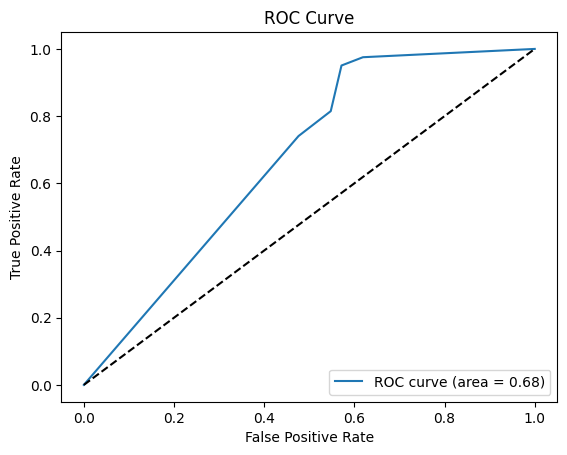

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(ytest,y_pred_proba)

# Calculate the AUC using the general auc function
roc_auc = auc(fpr, tpr)

# Plot the ROC curve (optional, but helpful for visualization)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Gradient Bostiing classifier

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
GB_pipeline = Pipeline([
          ('transformer',preprocessor),
           ('SMOTE',SMOTE(random_state=42)),
          ('classifier',GradientBoostingClassifier(random_state=42))#class_weight='balanced' forces the model to pay more attention to minority classes.
])

In [47]:
GB_pipeline.fit(xtrain,ytrain)

,steps,"[('transformer', ...), ('SMOTE', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [48]:
ytestpredGB = GB_pipeline.predict(xtest)

In [49]:
print(classification_report(ytestpredGB,ytest))

              precision    recall  f1-score   support

           0       0.43      0.62      0.51        29
           1       0.86      0.74      0.80        94

    accuracy                           0.72       123
   macro avg       0.65      0.68      0.65       123
weighted avg       0.76      0.72      0.73       123



In [50]:
from xgboost import XGBClassifier
xgbpipeline = Pipeline([
          ("feature_engineering",FeatureEngineer()),
          ('transformer',preprocessor),
           ('SMOTE',SMOTE(random_state=42)),
          ('classifier',XGBClassifier())
])

xgbpipeline.fit(xtrain,ytrain)
xtestpredXG = xgbpipeline.predict(xtest)
print(classification_report(xtestpredXG,ytest))
y_pred_probaXG = xgbpipeline.predict_proba(xtest)[:,1]
auc = roc_auc_score(ytest,y_pred_probaXG)
print(auc)

              precision    recall  f1-score   support

           0       0.48      0.67      0.56        30
           1       0.88      0.76      0.82        93

    accuracy                           0.74       123
   macro avg       0.68      0.72      0.69       123
weighted avg       0.78      0.74      0.75       123

0.7104644326866549


setting models parameters

In [51]:
import optuna
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

def objective(trial):

    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 800),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "eval_metric": "auc",
        "random_state": 42,
        "n_jobs": -1
    }

    xgbpipeline_opt = Pipeline([
        ("feature_engineering",FeatureEngineer()),
        ("transformer", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("classifier", XGBClassifier(**params))
    ])

    score = cross_val_score(
        xgbpipeline_opt,
        xtrain,
        ytrain,
        cv=5,
        scoring="roc_auc",
        n_jobs=-1
    )

    return score.mean()


In [52]:


sampler = optuna.samplers.TPESampler(seed=42)

study = optuna.create_study(
    direction="maximize",
    sampler=sampler
)

study.optimize(objective, n_trials=200)


[I 2025-12-26 19:11:21,498] A new study created in memory with name: no-name-f6c21903-4808-406b-a641-56b2f8c1138b


[I 2025-12-26 19:11:33,227] Trial 0 finished with value: 0.7596143839844783 and parameters: {'n_estimators': 425, 'max_depth': 10, 'learning_rate': 0.1205712628744377, 'min_child_weight': 12, 'gamma': 0.7800932022121826, 'subsample': 0.662397808134481, 'colsample_bytree': 0.6232334448672797}. Best is trial 0 with value: 0.7596143839844783.
[I 2025-12-26 19:11:39,327] Trial 1 finished with value: 0.7689402357644708 and parameters: {'n_estimators': 720, 'max_depth': 7, 'learning_rate': 0.11114989443094977, 'min_child_weight': 1, 'gamma': 4.8495492608099715, 'subsample': 0.9329770563201687, 'colsample_bytree': 0.6849356442713105}. Best is trial 1 with value: 0.7689402357644708.
[I 2025-12-26 19:11:39,791] Trial 2 finished with value: 0.7757889437634123 and parameters: {'n_estimators': 309, 'max_depth': 4, 'learning_rate': 0.028145092716060652, 'min_child_weight': 11, 'gamma': 2.1597250932105787, 'subsample': 0.7164916560792167, 'colsample_bytree': 0.8447411578889518}. Best is trial 2 with

In [53]:
best_params = study.best_params
best_params

{'n_estimators': 213,
 'max_depth': 8,
 'learning_rate': 0.011836093870860516,
 'min_child_weight': 1,
 'gamma': 0.18534320992522468,
 'subsample': 0.6182921793285238,
 'colsample_bytree': 0.8781925025565934}

In [54]:
from optuna.visualization.matplotlib import plot_optimization_history,plot_parallel_coordinate

Visualize

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20580\3040378434.py:1: ExperimentalWarning: optuna.visualization.matplotlib._optimization_history.plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  plot_optimization_history(study=study)


<Axes: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

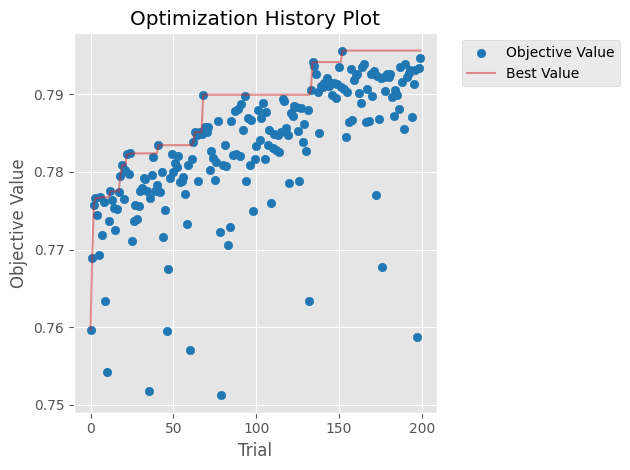

In [55]:
plot_optimization_history(study=study)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20580\3723936501.py:1: ExperimentalWarning: optuna.visualization.matplotlib._parallel_coordinate.plot_parallel_coordinate is experimental (supported from v2.2.0). The interface can change in the future.
  fig = plot_parallel_coordinate(study)


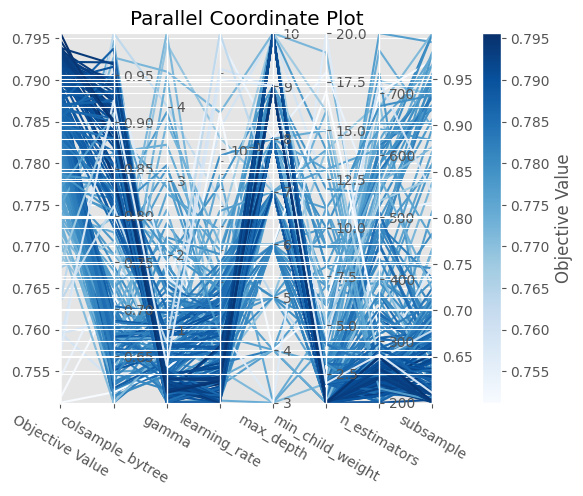

In [56]:

fig = plot_parallel_coordinate(study)
plt.show()

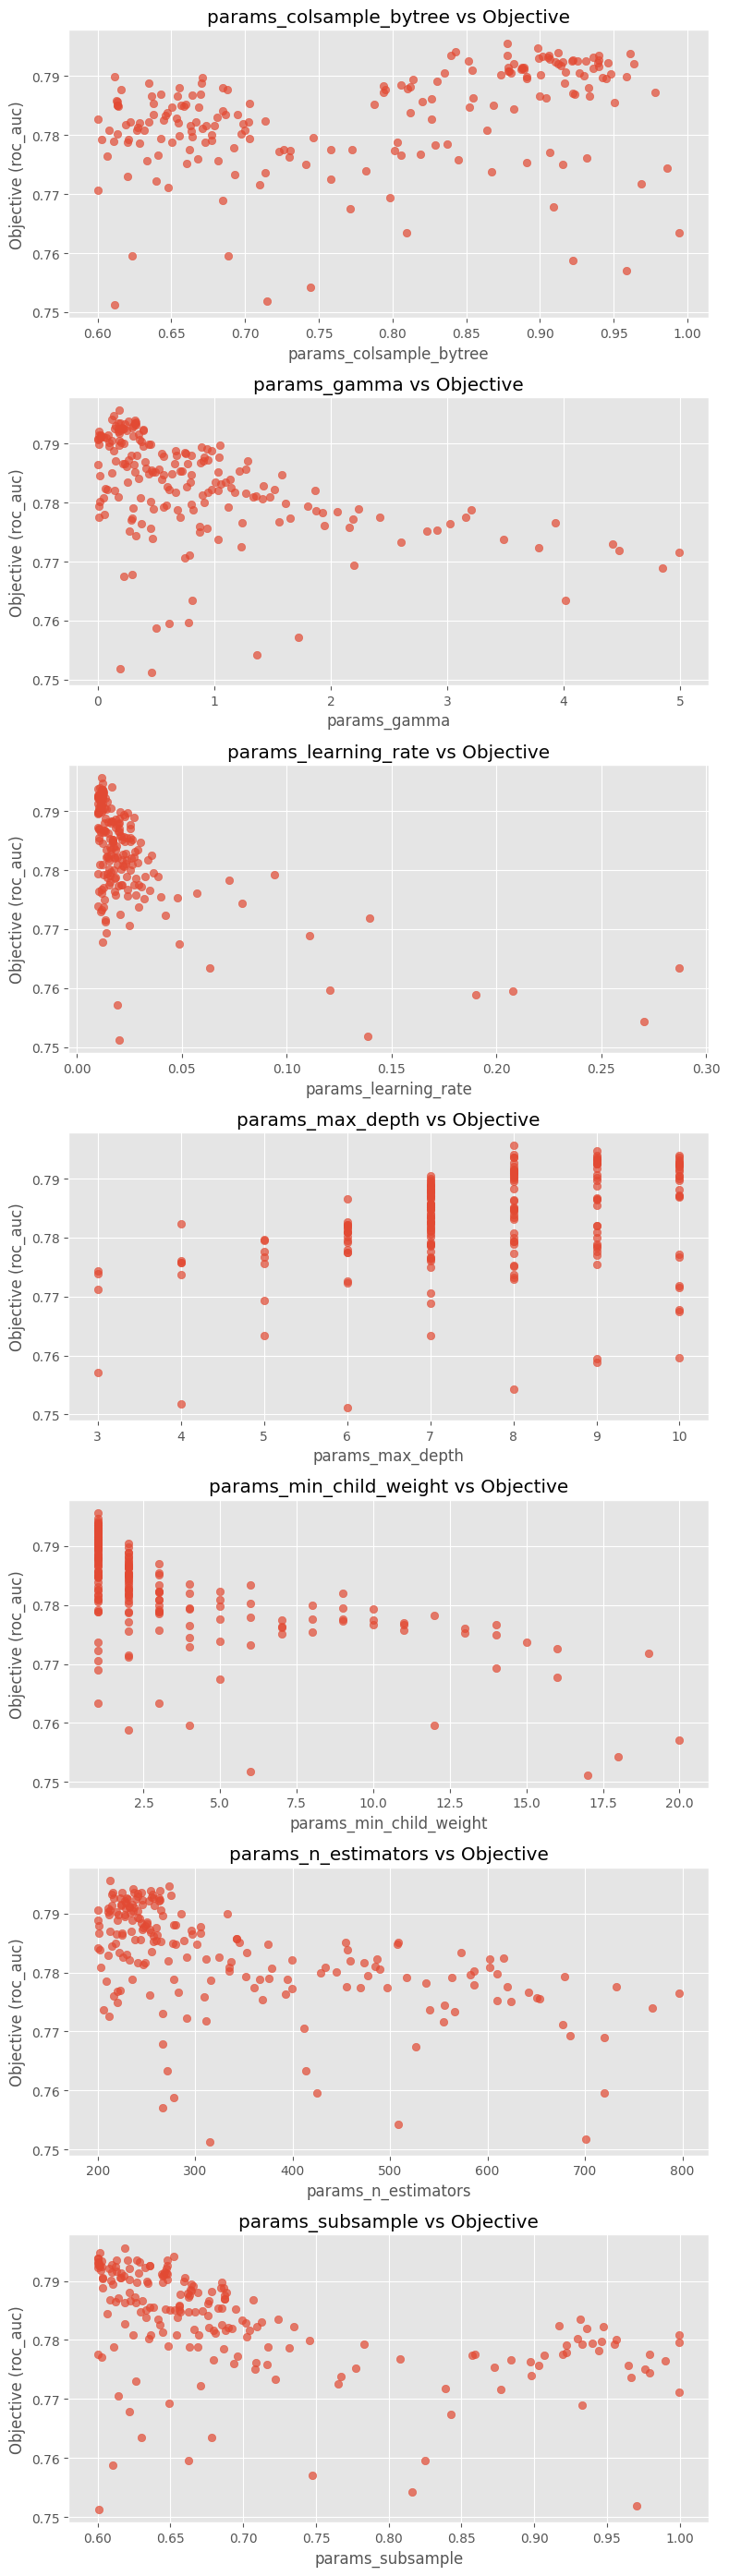

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract all trials from the study
trials = study.trials_dataframe(attrs=("number", "value", "params"))

# Loop through hyperparameters
params = [c for c in trials.columns if c not in ["number", "value", "state"]]

fig, axes = plt.subplots(len(params), 1, figsize=(8, 4*len(params)), sharex=False)

if len(params) == 1:
    axes = [axes]

for i, param in enumerate(params):
    axes[i].scatter(trials[param], trials["value"], alpha=0.7)
    axes[i].set_xlabel(param)
    axes[i].set_ylabel("Objective (roc_auc)")
    axes[i].set_title(f"{param} vs Objective")

plt.tight_layout()
plt.show()


create model for best params

In [58]:
xgbpipelineOPTAMIZED = Pipeline([
          ("feature_engineering",FeatureEngineer()),
          ('transformer',preprocessor),
          ('classifier',XGBClassifier(**best_params))])

xgbpipelineOPTAMIZED.fit(xtrain,ytrain)
xtestpredXG_optamized = xgbpipelineOPTAMIZED.predict(xtest)
print(classification_report(ytest,xtestpredXG_optamized))
y_pred_probaXG_OP = xgbpipelineOPTAMIZED.predict_proba(xtest)[:,1]
auc = roc_auc_score(ytest,y_pred_probaXG_OP)
print("model auc score : ",auc)

              precision    recall  f1-score   support

           0       0.89      0.40      0.56        42
           1       0.76      0.98      0.85        81

    accuracy                           0.78       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.81      0.78      0.75       123

model auc score :  0.7228101116990006


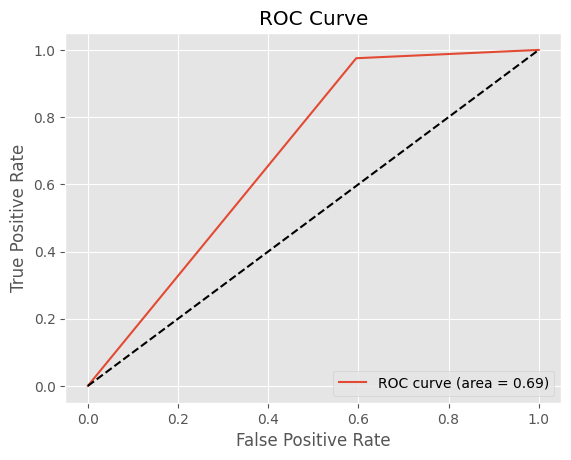

In [59]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(ytest,xtestpredXG_optamized)

# Calculate the AUC using the general auc function
roc_auc = auc(fpr, tpr)

# Plot the ROC curve (optional, but helpful for visualization)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


CHECKING F1 PERFOMACNE OF CLASS 0 ON DIFFRENT THRESH HOLD

In [60]:
from sklearn.metrics import f1_score
import numpy as np

# Probabilities for class 1
y_pred_proba = xgbpipelineOPTAMIZED.predict_proba(xtest)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.1)
f1_scores_class0 = []

for t in thresholds:
    # Predict class 0: if prob_class1 < threshold → predict class 0
    y_pred_class0 = (y_pred_proba < t).astype(int)  # 1 = class 0, 0 = class 1
    
    # Compute F1 for class 0
    f1 = f1_score(ytest, y_pred_class0, pos_label=1)  # now pos_label=1 since we mapped class 0 to 1
    f1_scores_class0.append(f1)


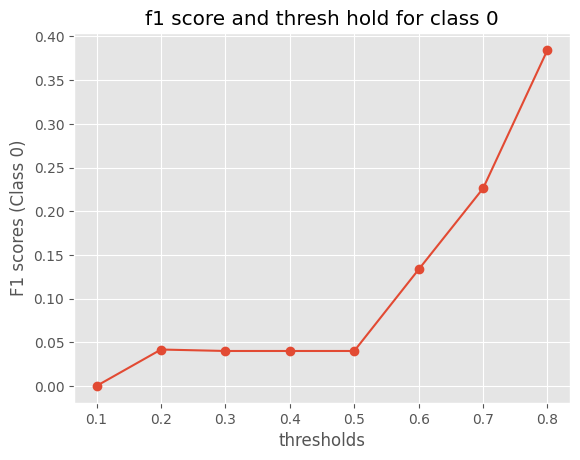

Best threshold: 0.8


NameError: name 'f1_scores' is not defined

In [63]:
#plot
plt.figure()
plt.plot(thresholds,f1_scores_class0,marker='o')
plt.xlabel("thresholds")
plt.ylabel("F1 scores (Class 0)")
plt.title("f1 score and thresh hold for class 0")
plt.show()

best_idx = np.argmax(f1_scores_class0)
best_threshold = thresholds[best_idx]

print("Best threshold:", best_threshold)
f1_scores_class0.append(f1)
print("Best F1 score:", f1_scores[best_idx])

but setting threshold to 0.3 my model is gonna catch more True positve and my recall for class 0 will drop
 

In [ ]:
from sklearn.metrics import precision_score

# Extract probabilities for class 1 (loan approved)
y_pred_proba = xgbpipelineOPTAMIZED.predict_proba(xtest)[:, 1]

# Thresholds to test
thresholds = np.arange(0.1, 0.9, 0.1)
precision_scores_class0 = []

# Loop through thresholds
for t in thresholds:
    # Predict class 0 based on threshold
    y_pred_class0 = (y_pred_proba >= t).astype(int)
    
    # Calculate precision for class 0
    precision = precision_score(ytest, y_pred_class0, pos_label=0)
    precision_scores_class0.append(precision)

# Plot Precision vs Threshold
plt.figure(figsize=(8,5))
plt.plot(thresholds, precision_scores_class0, marker='o', color='green')
plt.xlabel("Threshold for class 1")
plt.ylabel("Precision (Class 0)")
plt.title("Precision vs Threshold for Class 0")
plt.grid(True)
plt.show()

# Find the best threshold
best_idx = np.argmax(precision_scores_class0)
best_threshold = thresholds[best_idx]

print("Best threshold for maximizing precision (Class 0):", best_threshold)
print("Best precision (Class 0):", precision_scores_class0[best_idx])


In [ ]:
from sklearn.metrics import recall_score
import numpy as np
import matplotlib.pyplot as plt

# Extract probabilities for class 1 (loan approved)
y_pred_proba = xgbpipelineOPTAMIZED.predict_proba(xtest)[:, 1]

# Thresholds to test
thresholds = np.arange(0.1, 0.9, 0.1)
recall_scores_class0 = []

# Loop through thresholds
for t in thresholds:
    # Predict class 0 based on threshold
    y_pred_class0 = (y_pred_proba >= t).astype(int)
    
    # Calculate recall for class 0
    recall = recall_score(ytest, y_pred_class0, pos_label=0)
    recall_scores_class0.append(recall)

# Plot Recall vs Threshold
plt.figure(figsize=(8,5))
plt.plot(thresholds, recall_scores_class0, marker='o', color='orange')
plt.xlabel("Threshold for class 1")
plt.ylabel("Recall (Class 0)")
plt.title("Recall vs Threshold for Class 0")
plt.grid(True)
plt.show()

# Find the best threshold
best_idx = np.argmax(recall_scores_class0)
best_threshold = thresholds[best_idx]

print("Best threshold for maximizing recall (Class 0):", best_threshold)
print("Best recall (Class 0):", recall_scores_class0[best_idx])


After looking at the graphs, I decided to set the threshold to 0.6.

> At 0.6, the recall for class 0 (bad loans) improves a bit, which is important because approving a bad loan is risky in real life.

> Setting the threshold to 0.8 makes the model worse:

> Precision for class 0 drops, so many good loans get wrongly rejected.

> Recall for class 1 drops, so the model misses many good applicants.

> A threshold of 0.6 gives same results as 0.5 so we will keep this

> This choice focuses on reducing risky loan approvals, not just maximizing F1 score.

In [69]:
# Final threshold
threshold = 0.6
y_pred_probaFinal = (y_pred_proba>=threshold).astype(int)
print(classification_report(ytest, y_pred_probaFinal))


              precision    recall  f1-score   support

           0       0.71      0.40      0.52        42
           1       0.75      0.91      0.82        81

    accuracy                           0.74       123
   macro avg       0.73      0.66      0.67       123
weighted avg       0.73      0.74      0.72       123



Extracting Feature Importance

In [64]:
coef = xgbpipelineOPTAMIZED.named_steps['classifier'].feature_importances_
coef

array([0.02969904, 0.02556154, 0.03864267, 0.03507673, 0.02943727,
       0.03811525, 0.03337001, 0.02716557, 0.01929973, 0.03243927,
       0.03131048, 0.04089376, 0.04716267, 0.02403189, 0.03313718,
       0.03695586, 0.03596886, 0.03677608, 0.4049562 ], dtype=float32)

In [65]:
preprocessor = xgbpipelineOPTAMIZED.named_steps['transformer']  #get transformer

In [66]:
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out() # get names of features
num_features = preprocessor.named_transformers_['num'].get_feature_names_out()
feature_names = list(cat_features)+list(num_features)

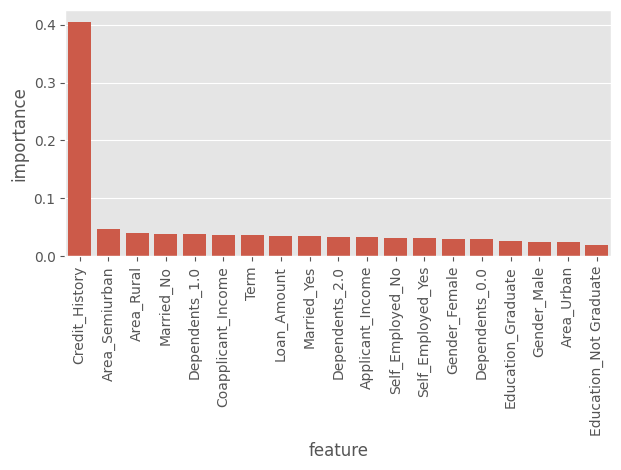

In [67]:
feat_imp = pd.DataFrame({
         'feature':feature_names,
         'importance':coef
}).sort_values(by='importance',ascending=False)
sns.barplot(x='feature',y='importance',data=feat_imp)
plt.xticks(rotation=90)
plt.tight_layout() 

In [68]:
import joblib
joblib.dump(xgbpipelineOPTAMIZED,"bestmodel33.pkl")

['bestmodel33.pkl']